In [1]:
import pandas as pd
import upsetplot

In [3]:
# 8种qtl的重叠情况
BF_threshold = 10

m6A = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m6Aqtl/nano_merge_m6A_summary.csv')
pseU = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/pseUqtl/nano_merge_pseU_summary.csv')
inosine = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/Iqtl/nano_merge_I_summary.csv')
m5C = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m5Cqtl/nano_merge_m5C_summary.csv')

m6A = m6A[m6A['BayesFactor'] >= BF_threshold]
pseU = pseU[pseU['BayesFactor'] >= BF_threshold]
inosine = inosine[inosine['BayesFactor'] >= BF_threshold]
m5C = m5C[m5C['BayesFactor'] >= BF_threshold]

m6A['k'] = m6A['chrom'] + ':' + m6A['snp_pos_1base'].astype(str) + m6A['strand'] + m6A['rsID']
pseU['k'] = pseU['chrom'] + ':' + pseU['snp_pos_1base'].astype(str) + pseU['strand'] + pseU['rsID']
inosine['k'] = inosine['chrom'] + ':' + inosine['snp_pos_1base'].astype(str) + inosine['strand'] + inosine['rsID']
m5C['k'] = m5C['chrom'] + ':' + m5C['snp_pos_1base'].astype(str) + m5C['strand'] +  m5C['rsID']

contents = {
    "m6AQTL": list(set(m6A['k'])),
    "pseUQTL": list(set(pseU['k'])),
    "IQTL": list(set(inosine['k'])),
    "m5CQTL": list(set(m5C['k']))
}

d = upsetplot.from_contents(contents)
# 计算交集数量
intersection_counts = d.groupby(d.index.map(sum)).size()

# 获取两种、三种、四种和五种相交的数量
four_way_intersections = intersection_counts.get(4, 0)
three_way_intersections = intersection_counts.get(3, 0)


# 打印结果
print(f"4种相交的数量: {four_way_intersections}")
print(f"3种相交的数量: {three_way_intersections}")

four_way_intersection = d[(d["m6AQTL"] == True) & 
                          (d["pseUQTL"] == True) & 
                          (d["IQTL"] == True) & 
                          (d["m5CQTL"] == True)]

print(four_way_intersection)

/tmp/ipykernel_5163/3874106833.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pseU = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/pseUqtl/nano_merge_pseU_summary.csv')
/tmp/ipykernel_5163/3874106833.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  m5C = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m5Cqtl/nano_merge_m5C_summary.csv')
/mnt/hpc/home/xuxinran/mambaforge/envs/methy1/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


4种相交的数量: 2
3种相交的数量: 26


KeyError: 'm6AQTL'

In [17]:
d[d.index.map(sum) == 4]

id
m6AQTL pseUQTL IQTL m5CQTL                            
True   True    True True    chr10:51584682+rs141659397
                    True     chr2:44173344-rs118188415

In [7]:
# 提取对应的列
rsID = "rs141659397"
m6A_data = m6A[m6A['rsID'] == rsID][['A1_A', 'A2_A', 'A1_m6A', 'A2_m6A', 'BayesFactor']]
m6A_data['A1_m6A_rate'] = m6A_data['A1_m6A'] / (m6A_data['A1_m6A'] + m6A_data['A1_A'])
m6A_data['A2_m6A_rate'] = m6A_data['A2_m6A'] / (m6A_data['A2_m6A'] + m6A_data['A2_A'])
m6A_data["BayesFactor"] = m6A_data["BayesFactor"].round(2)


m5C_data = m5C[m5C['rsID'] == rsID][['A1_C', 'A2_C', 'A1_m5C', 'A2_m5C', 'BayesFactor']]
m5C_data['A1_m5C_rate'] = m5C_data['A1_m5C'] / (m5C_data['A1_m5C'] + m5C_data['A1_C'])
m5C_data['A2_m5C_rate'] = m5C_data['A2_m5C'] / (m5C_data['A2_m5C'] + m5C_data['A2_C'])
m5C_data["BayesFactor"] = m5C_data["BayesFactor"].round(2)


pseU_data = pseU[pseU['rsID'] == rsID][['A1_U', 'A2_U', 'A1_pseU', 'A2_pseU', 'BayesFactor']]
pseU_data['A1_pseU_rate'] = pseU_data['A1_pseU'] / (pseU_data['A1_pseU'] + pseU_data['A1_U'])
pseU_data['A2_pseU_rate'] = pseU_data['A2_pseU'] / (pseU_data['A2_pseU'] + pseU_data['A2_U'])
pseU_data["BayesFactor"] = pseU_data["BayesFactor"].round(2)


i_data = inosine[inosine['rsID'] == rsID][['A1_A', 'A2_A', 'A1_I', 'A2_I', 'BayesFactor']]
i_data["BayesFactor"] = i_data["BayesFactor"].round(2)
i_data['A1_i_rate'] = i_data['A1_I'] / (i_data['A1_I'] + i_data['A1_A'])
i_data['A2_i_rate'] = i_data['A2_I'] / (i_data['A2_I'] + i_data['A2_A'])


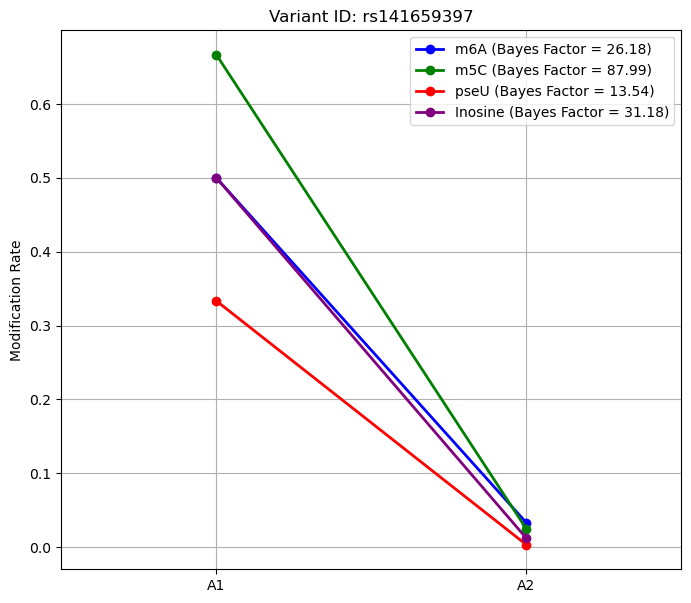

In [8]:
import matplotlib.pyplot as plt

# 设置绘图样式
plt.figure(figsize=(8, 7))

# 绘制每种修饰的 A1 和 A2 修饰率
# 对于 m6A
plt.plot(['A1', 'A2'], [m6A_data['A1_m6A_rate'].values[0], m6A_data['A2_m6A_rate'].values[0]], 
         marker='o', label=f'm6A (Bayes Factor = {m6A_data["BayesFactor"].values[0]})', color='blue', linestyle='-', linewidth=2)

# 对于 m5C
plt.plot(['A1', 'A2'], [m5C_data['A1_m5C_rate'].values[0], m5C_data['A2_m5C_rate'].values[0]], 
         marker='o', label=f'm5C (Bayes Factor = {m5C_data["BayesFactor"].values[0]})', color='green', linestyle='-', linewidth=2)

# 对于 pseU
plt.plot(['A1', 'A2'], [pseU_data['A1_pseU_rate'].values[0], pseU_data['A2_pseU_rate'].values[0]], 
         marker='o', label=f'pseU (Bayes Factor = {pseU_data["BayesFactor"].values[0]})', color='red', linestyle='-', linewidth=2)

# 对于 inosine
# plt.plot(['A1', 'A2'], [i_data['A1_i_rate'].values[0], i_data['A2_i_rate'].values[0]], 
#          marker='o', label=f'Inosine (Bayes Factor = {i_data["BayesFactor"].values[0]})', color='purple', linestyle='-', linewidth=2)
plt.plot(['A1', 'A2'], [i_data['A1_i_rate'].values[0], i_data['A2_i_rate'].values[0]], 
         marker='o', label=f'Inosine (Bayes Factor = 31.18)', color='purple', linestyle='-', linewidth=2)

# 设置图表标题和标签
plt.title(f'Variant ID: {rsID}')
# plt.xlabel('Genotype (A1 vs A2)')
plt.ylabel('Modification Rate')

# 添加图例
plt.legend()

# 显示图表
plt.grid(True)

# 调整横坐标，使 A1 和 A2 更近
plt.xticks([0, 1], ['A1', 'A2'])

# 设置 x 轴范围，使 A1 和 A2 更接近
plt.xlim(-0.5, 1.5)

# 保存为 PDF 文件
plt.savefig(f'/mnt/hpc/home/xuxinran/DirectSeq/8_downsteam/A1A2_modrate/{rsID}.pdf', format='pdf')

# 显示图表
plt.show()
